In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

In [3]:
X, y = fetch_openml('mnist_784', version=1, as_frame=True, return_X_y=True)

In [4]:
from scipy.io import arff

data, _ = arff.loadarff('../../data/external/mnist_784.arff')
raw_data = pd.DataFrame(data)

X = raw_data.iloc[:, :-1]  # All columns except last
y = raw_data.iloc[:, -1]

# Convert y to numeric
y = pd.to_numeric(y)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85, stratify=y)



In [7]:
def shift_left(image_data):
    """Shift the image data to the left by one pixel."""
    return np.roll(image_data, -1, axis=1)

def shift_right(image_data):
    """Shift the image data to the right by one pixel."""
    return np.roll(image_data, 1, axis=1)

def shift_up(image_data):
    """Shift the image data up by one pixel."""
    return np.roll(image_data, -1, axis=0)

def shift_down(image_data):
    """Shift the image data down by one pixel."""
    return np.roll(image_data, 1, axis=0)

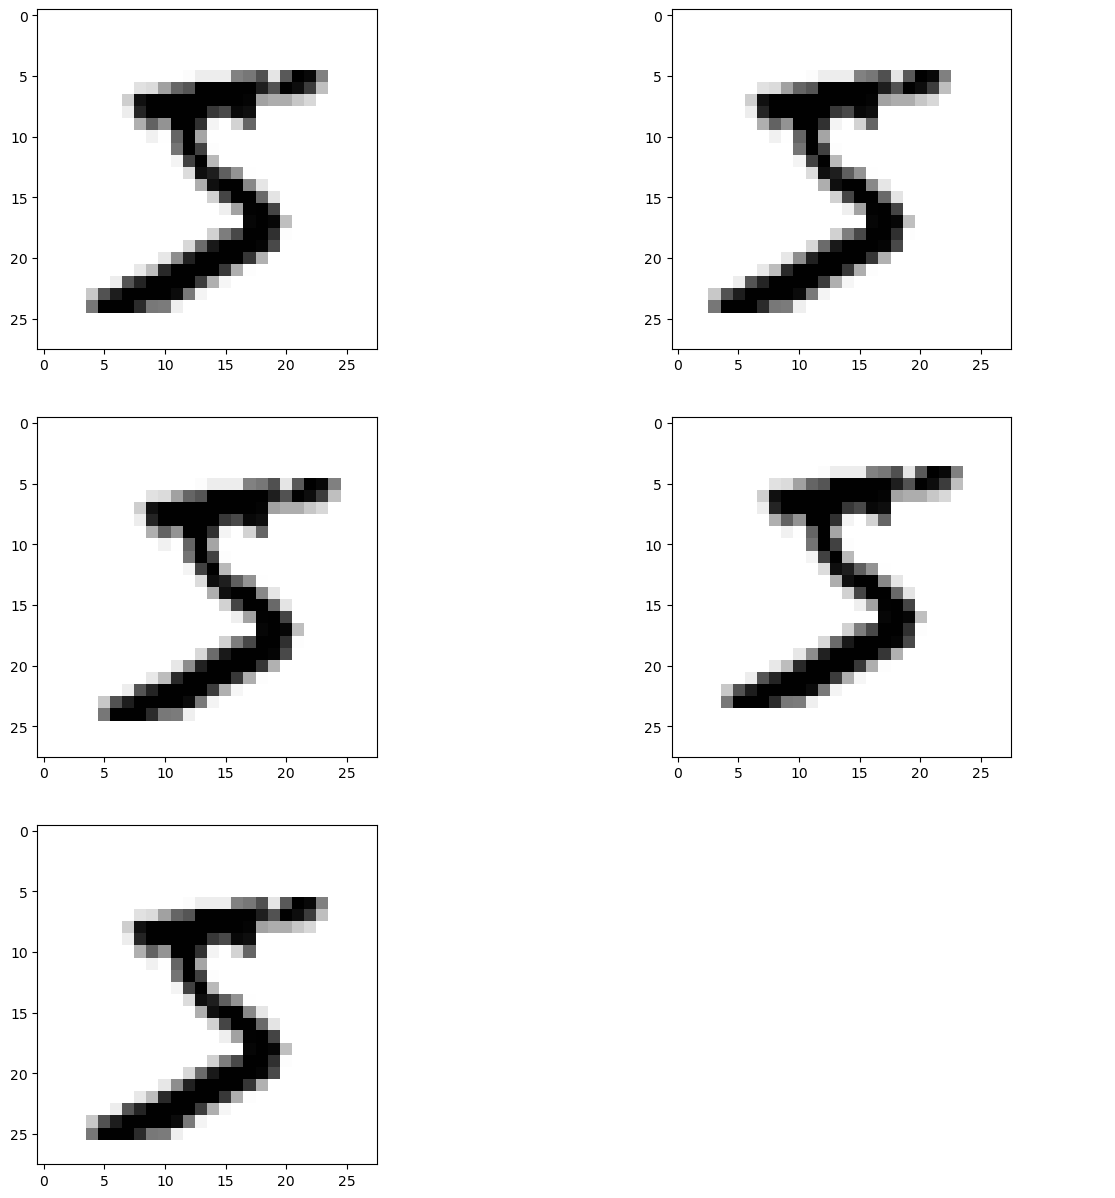

In [12]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    image = image_data.reshape(28, 28)
    image_left = shift_left(image)
    image_right = shift_right(image)
    image_up = shift_up(image)
    image_down = shift_down(image)
    axes[0, 0].imshow(image, cmap="binary")
    axes[0, 1].imshow(image_left, cmap="binary")
    axes[1, 0].imshow(image_right, cmap="binary")
    axes[1, 1].imshow(image_up, cmap="binary")
    axes[2, 0].imshow(image_down, cmap="binary")
    # plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = np.array(X.iloc[0])
plot_digit(some_digit)
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

classifiers = [
    # ('SGD Classifier', SGDClassifier(), {}),
    ('Logistic Regression', LogisticRegression(max_iter=1000), {'classifier__max_iter': [100, 500, 1000], 'classifier__C': [0.01, 0.1, 1, 10]}),
    # ('Ridge Classifier', RidgeClassifier(), {'classifier__tol': [1e-4, 1e-3, 1e-2], 'classifier__alpha': [0.0001, 0.001, 0.01], 'classifier__max_iter': [100, 500, 1000]}),
    # ('Random Forest Classifier', RandomForestClassifier(), {'classifier__n_estimators': [100, 500, 1000]}),
    # ('Gradient Boosting Classifier', GradientBoostingClassifier(), {'classifier__n_estimators': [100, 500, 1000], 'classifier__learning_rate': [0.001, 0.01, 0.1, 1]})
]

In [35]:
from sklearn.pipeline import Pipeline

grid_search_results = pd.DataFrame(columns=['Best Score', 'Test Score', 'Model'])

print("Starting grid search for classifiers...")

for name, clf, params in classifiers:
    
    # print(f"Training {name}...")
    
    pipeline = Pipeline(steps=[
        ('classifier', clf)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    score = grid_search.score(X_test, y_test)
    # print(f"{name} test score: {score:.4f}")
    # print(f"{name} best score: {grid_search.best_score_:.4f}")
    # print(f"{name} best parameters: {grid_search.best_params_}")

    grid_search_results.loc[name, 'Best Score'] = grid_search.best_score_
    grid_search_results.loc[name, 'Test Score'] = score

    print(f"{name} - Best Score: {grid_search.best_score_:.4f}, Test Score: {score:.4f}")

    print('\n\n')

Starting grid search for classifiers...


/opt/anaconda3/envs/ml-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

KeyboardInterrupt: 

In [16]:
grid_search_results

,Best Score,Test Score,Model
SGD Classifier,0.960286,0.967857,NaN


In [24]:
from sklearn.model_selection import cross_val_predict

scores = cross_val_predict(clf, X_train, y_train, cv=5, method='decision_function')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [-22896.29175589 -27961.20797204 -25753.21478402 ... -21029.80242777
 -13928.89708678 -14696.92848428]
Mean cross-validation score: -14384.109707227137


In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, scores, pos_label=5)


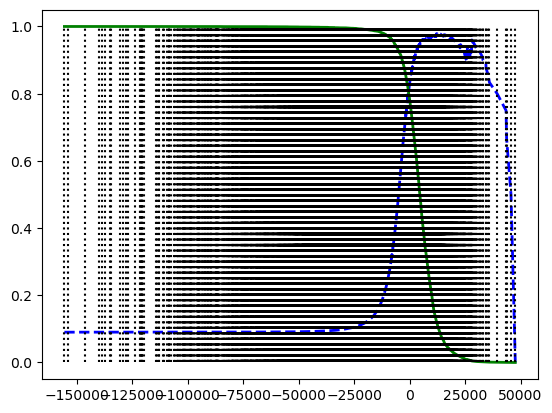

In [28]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

In [1]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

NameError: name 'plt' is not defined